In [1]:
### set environment
import numpy as np
import pandas as pd
import argparse
import os

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Dimension reduction and clustering libraries
import umap
import phenograph

import matplotlib.pyplot as plt

In [2]:
txt_fdiry = "/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary2"
txt_fname = "matrix.annotation.prepare.cres_vote2.chipseq_full.fcc.tss.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

mat = pd.read_csv(txt_fpath, sep="\t")
vec = mat.Region
mat = mat.set_index('Region')

mat_region_annot_fcc = mat
print(mat.shape)
mat.head()

(22517, 536)


,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif,...,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
Region,,,,,,,,,,,,,,,,,,,,,
chr1:778233-779389,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
chr1:842516-843431,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr1:912735-913419,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr1:958722-959968,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
chr1:960468-961615,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
X = mat_region_annot_fcc.to_numpy()
X.shape

(22517, 536)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 28.6 s, sys: 5.52 s, total: 34.1 s
Wall time: 26.1 s


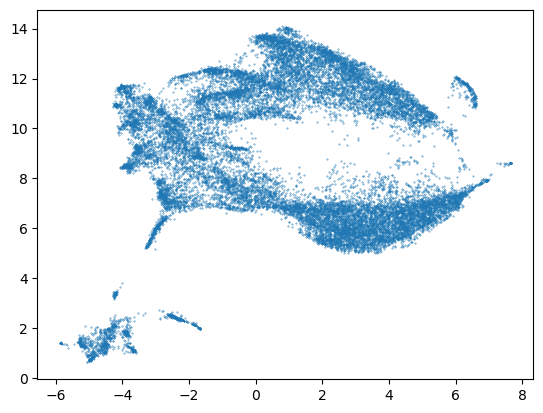

In [6]:
%%time
X_ump = umap.UMAP(n_neighbors=15, metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 1min 5s, sys: 7.79 s, total: 1min 13s
Wall time: 1min 1s


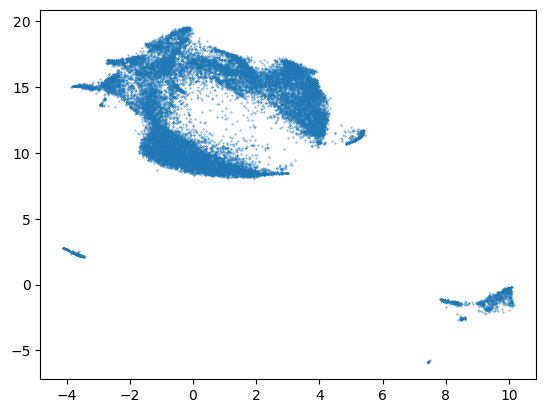

In [7]:
%%time
X_ump = umap.UMAP(n_neighbors=50, metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 1min 5s, sys: 7.68 s, total: 1min 13s
Wall time: 1min 1s


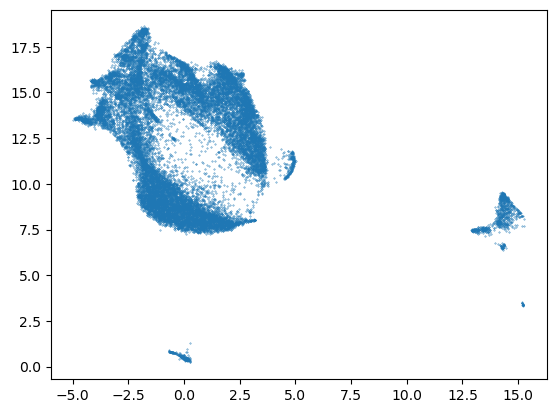

In [12]:
%%time
X_ump = umap.UMAP(n_neighbors=50, metric = "manhattan", min_dist = 0.15, random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 1min 24s, sys: 10.7 s, total: 1min 35s
Wall time: 1min 19s


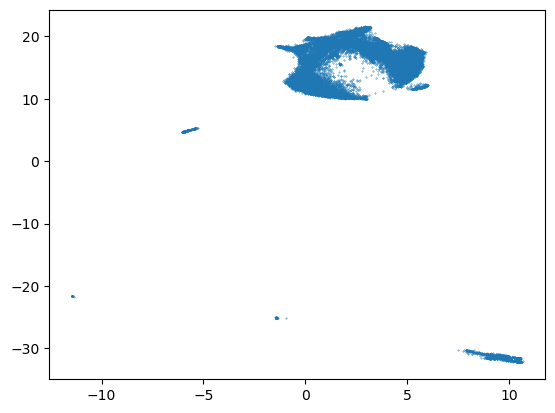

In [8]:
%%time
X_ump = umap.UMAP(n_neighbors=70, metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 1min 43s, sys: 14.6 s, total: 1min 58s
Wall time: 1min 38s


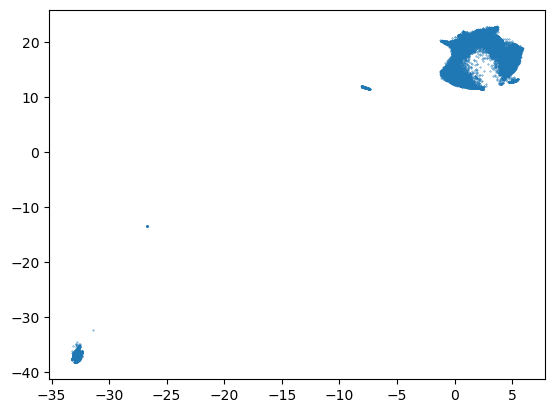

In [9]:
%%time
X_ump = umap.UMAP(n_neighbors=90, metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)

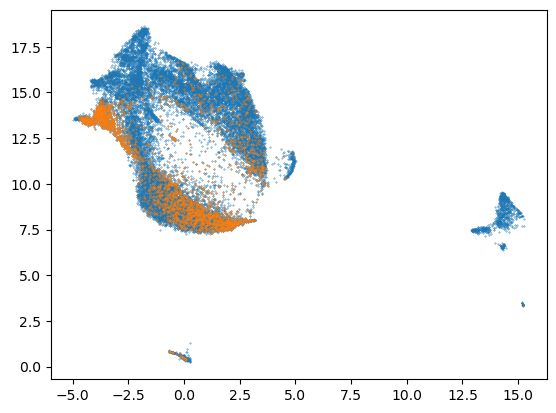

In [44]:
y1 = mat_region_annot_fcc.loc[:,"CTCF"].to_numpy().astype(int)
y2 = mat_region_annot_fcc.loc[:,"SMC3"].to_numpy().astype(int)
y  = y1 * y2
i  = y == 1

plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)
plt.scatter(X_ump[i, 0], X_ump[i, 1], s=0.1)
plt.show()

In [32]:
%%time
communities, graph, Q = phenograph.cluster(X, k=50, primary_metric="manhattan", clustering_algo="leiden")

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 57.22820043563843 seconds
Jaccard graph constructed in 6.156347990036011 seconds
Running Leiden optimization
Leiden completed in 31.70678472518921 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 99.2834951877594 seconds
CPU times: user 8min 14s, sys: 8.6 s, total: 8min 23s
Wall time: 1min 39s


In [33]:
communities.astype(int)

array([2, 1, 7, ..., 3, 0, 1])

In [34]:
pd.Series(communities).describe()

count    22517.000000
mean         3.679620
std          3.386727
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         14.000000
dtype: float64

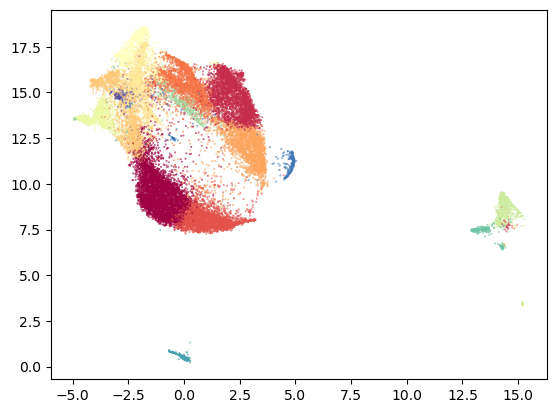

In [35]:
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1, c=communities.astype(int), cmap='Spectral')
plt.show()

In [31]:
cmap = plt.get_cmap('Spectral')
num_colors = cmap.N

print(num_colors)

256


In [26]:
communities.astype(int) == 0

array([False, False, False, ..., False,  True, False])

0


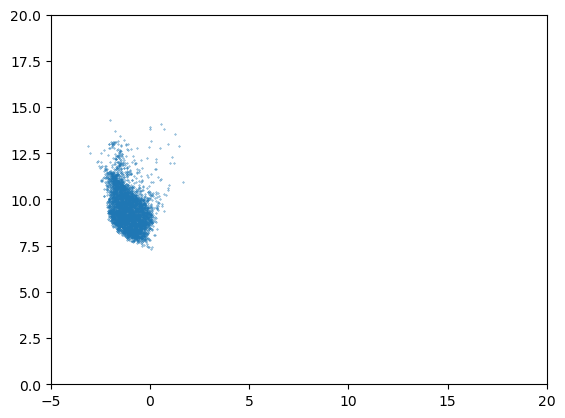

1


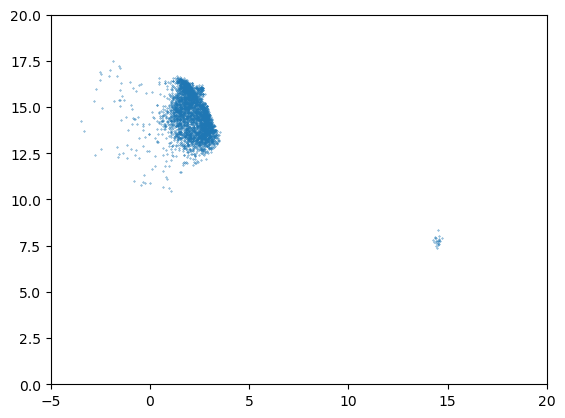

2


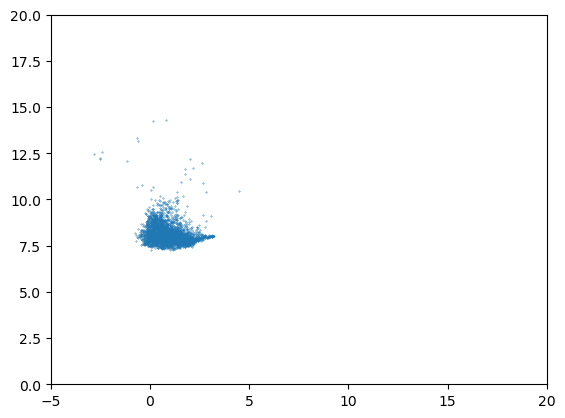

3


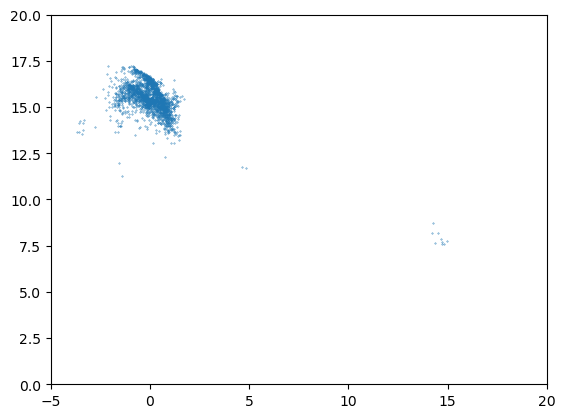

4


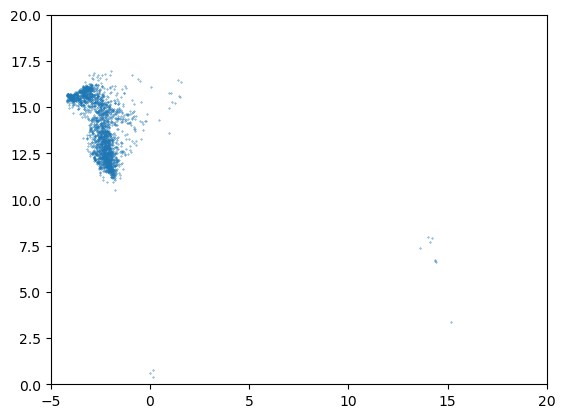

5


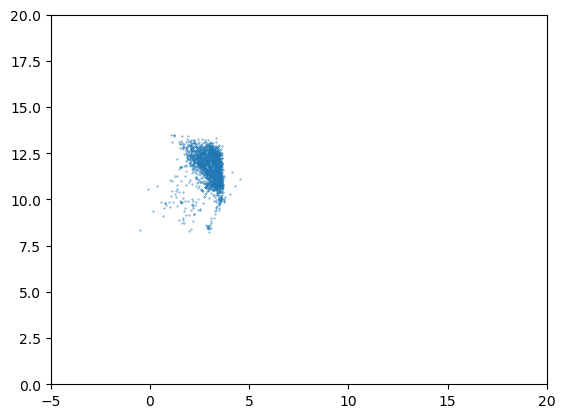

6


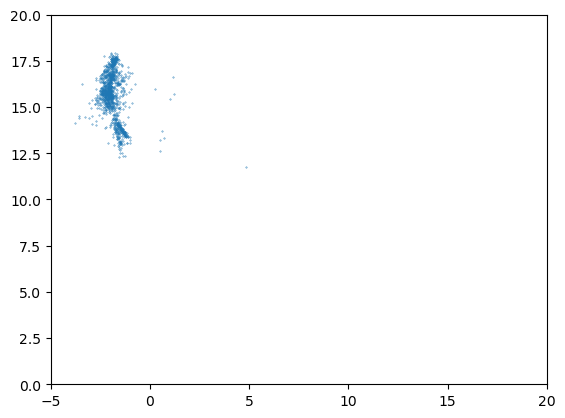

7


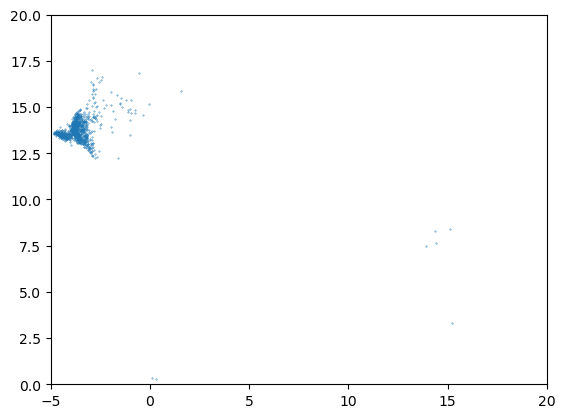

8


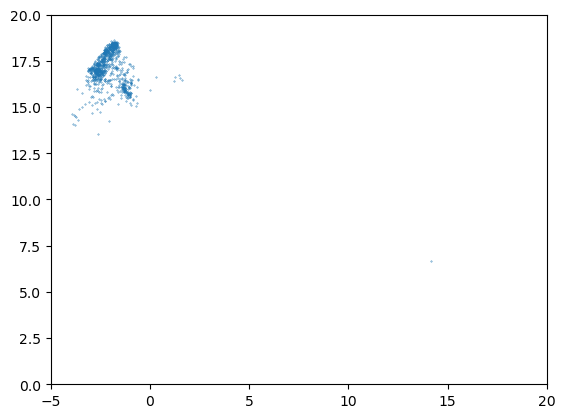

9


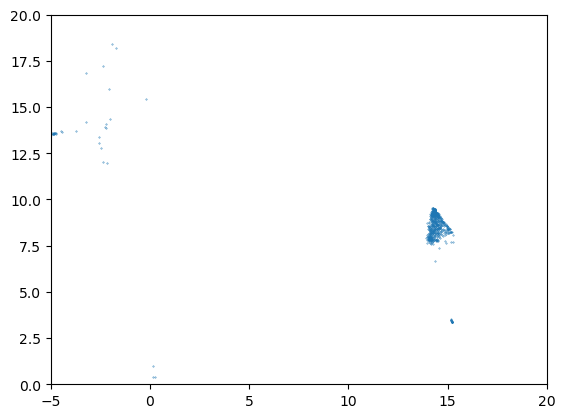

10


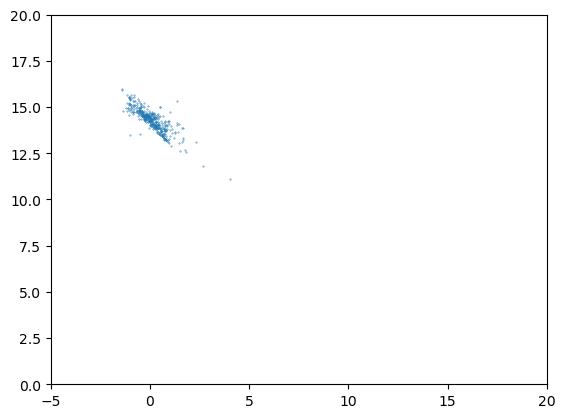

11


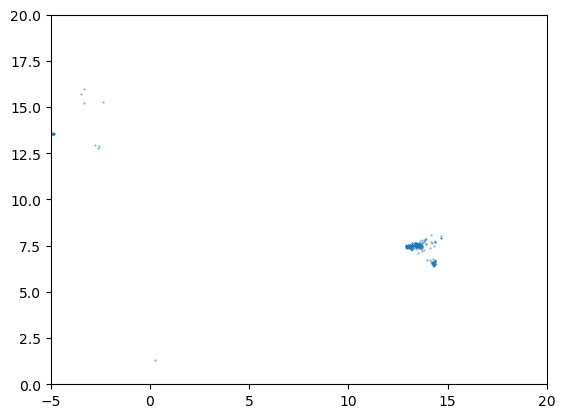

12


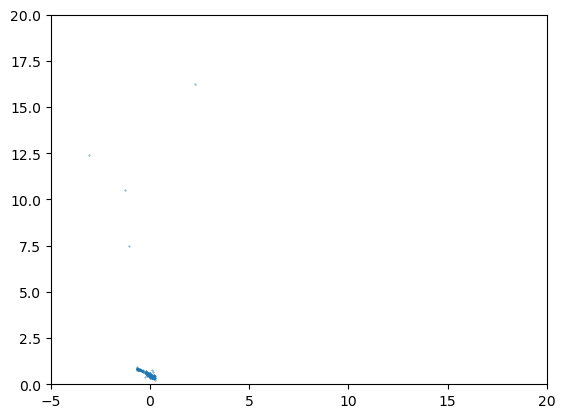

13


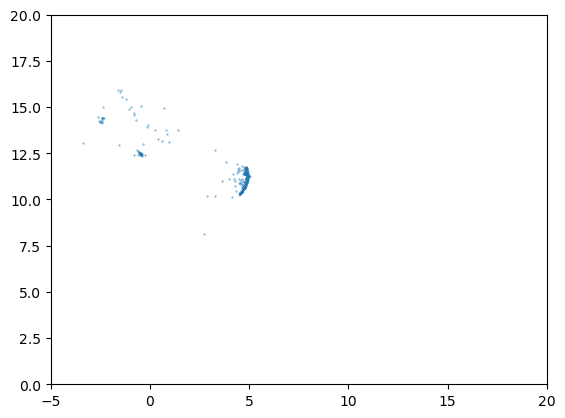

14


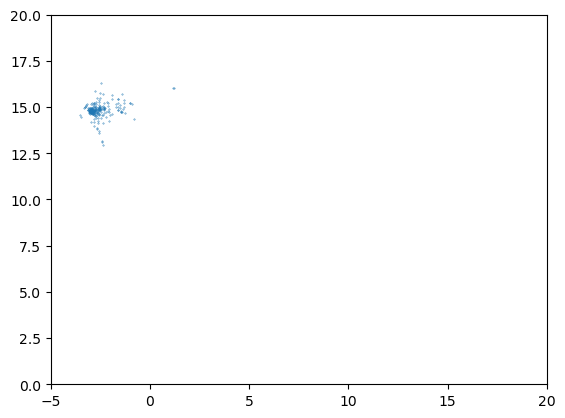

In [30]:
for i in range(15):
    print(i)
    idx = (communities.astype(int) == i)
    plt.scatter(X_ump[idx, 0], X_ump[idx, 1], s=0.1)
    plt.axis([-5, 20, 0, 20])
    plt.show()